In [1]:
import squigglepy as sq

from datetime import datetime
from pprint import pprint

from libs import run_model, plot_exponential_growth, analyze_agi_arrival, calculate_doubling_time
from chinese_model_params import start_task_length, shift, current_best_date
from model_params import agi_task_length, doubling_time

print("Loaded libraries")

Loaded libraries


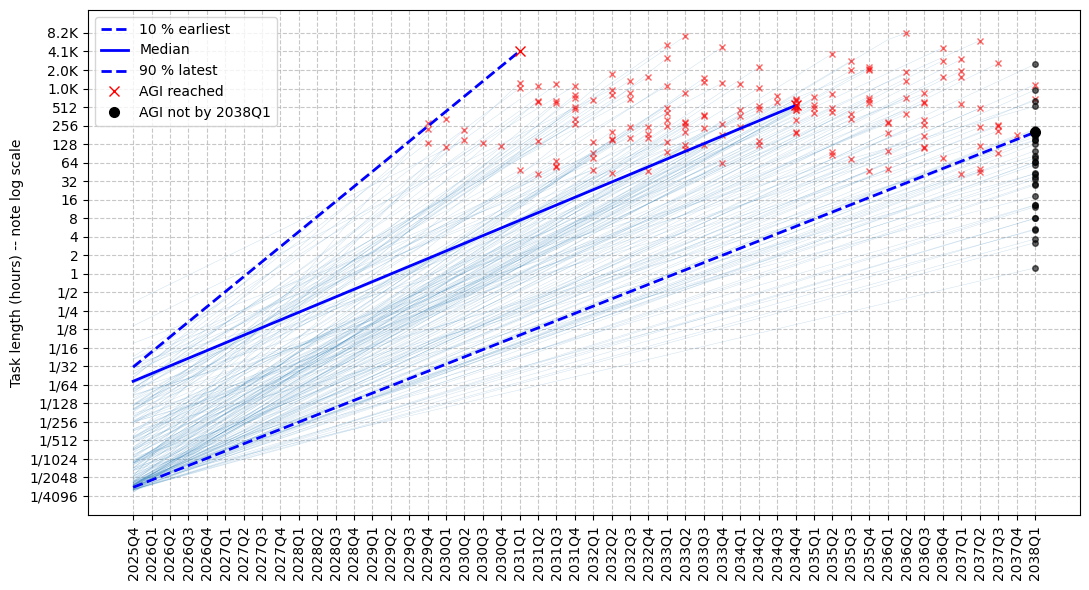

In [2]:
samples = plot_exponential_growth(
    doubling_time_days=doubling_time,
    start_hours=start_task_length,
    start_date=current_best_date,
    agi_task_length=agi_task_length,
    shift=shift,
    n_quarters=49,
    n_samples=100_000,
    n_traces=200,
    max_task_power=13,
    min_y_power=-15,
)

In [3]:
### UNDER CONSTRUCTION

"""
╔══════════════════════════════════════════════════════════╗
║                                                          ║
║                  UNDER CONSTRUCTION                      ║
║                                                          ║
║                      /\                                  ║
║                     /  \                                 ║
║                    / !! \                                ║
║                   /      \                               ║
║                  /   O    \                              ║
║                 /   /|\    \                             ║
║                /   / | \    \                            ║
║               /     _|_      \                           ║
║              /     / |        \                          ║
║             /     /  |         \                         ║
║            /    _/   |__        \                        ║
║           /    /        \        \                       ║
║          /    |          |________\                      ║
║         /     |         /           \                    ║
║        /______|________/─────────────\                   ║
║              Digging...                                  ║
║                                                          ║
║              PARDON OUR DUST                             ║
║                                                          ║
║        This part is currently being built!               ║
║          Please check back soon...                       ║
║                                                          ║
║                                                          ║
╚══════════════════════════════════════════════════════════╝
"""

'\n╔══════════════════════════════════════════════════════════╗\n║                                                          ║\n║                  UNDER CONSTRUCTION                      ║\n║                                                          ║\n║                      /\\                                  ║\n║                     /  \\                                 ║\n║                    / !! \\                                ║\n║                   /      \\                               ║\n║                  /   O    \\                              ║\n║                 /   /|\\    \\                             ║\n║                /   / | \\    \\                            ║\n║               /     _|_      \\                           ║\n║              /     / |        \\                          ║\n║             /     /  |         \\                         ║\n║            /    _/   |__        \\                        ║\n║           /    /        \\        \\                

In [4]:
# -----------
# ACCELERATION: Is the curve actually superexponential or subexponential? Does the doubling time itself change? Set the curve parameter.

print("\n\n")
print("## ACCELERATION")
acceleration = sq.mixture([
        [0.1, 1 + sq.lognorm(0.005, 0.1, credibility=80)],
        [0.8, 1],
        [0.1, 1 - sq.lognorm(0.005, 0.1, credibility=80)],
    ])
pprint(sq.get_percentiles(acceleration @ 100_000, digits=3))




## ACCELERATION
{1: 0.898,
 5: 0.978,
 10: 1.0,
 20: 1.0,
 30: 1.0,
 40: 1.0,
 50: 1.0,
 60: 1.0,
 70: 1.0,
 80: 1.0,
 90: 1.002,
 95: 1.023,
 99: 1.102}


In [5]:
def adapted_metr_model():
    start_task_length_ = start_task_length * (2 ** (shift / doubling_time))
    days = calculate_doubling_time(start_task_length_, agi_task_length, doubling_time)
    measurement_error_variance = sq.invlognorm(0.8, 1.5) # Add measurement error on tasks: SD fit to trend variance from Figure 12
    return days * measurement_error_variance

samples = run_model(adapted_metr_model, index_date=current_best_date, cores=4)
print('\n\n')
analyze_agi_arrival(samples)

Generating samples with 4 cores...


100%|███████████████████████████████████████████████████████████████████████████| 100000/100000 [00:28<00:00, 3459.27it/s]


Shuffling data...
Waiting for other cores...


100%|█████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 2098.73it/s]


...Collected!
{1: 1202,
 5: 1664,
 10: 1987,
 20: 2447,
 30: 2835,
 40: 3194,
 50: 3578,
 60: 3993,
 70: 4498,
 80: 5179,
 90: 6237,
 95: 7301,
 99: 9778}

-

{1: '2029 Feb 18',
 5: '2030 May 26',
 10: '2031 Apr 15',
 20: '2032 Jul 17',
 30: '2033 Aug 09',
 40: '2034 Aug 03',
 50: '2035 Aug 22',
 60: '2036 Oct 11',
 70: '2038 Feb 28',
 80: '2040 Jan 09',
 90: '2042 Dec 02',
 95: '2045 Oct 31',
 99: '2052 Aug 13'}



## DISTRIBUTION OF AGI ARRIVAL DATE ##
1%: 2028.3
2%: 2028.7
3%: 2029.0
4%: 2029.3
5%: 2029.6
10%: 2030.4
15%: 2031.1
20%: 2031.7
25%: 2032.3
35%: 2033.3
50%: 2034.8
60%: 2035.9
75%: 2038.2
80%: 2039.2
90%: 2042.1
95%: 2045.0


## DISTRIBUTION OF RELATIVE AGI ARRIVAL DATE ##
1%: 3.3 years from now
2%: 3.7 years from now
3%: 4.0 years from now
4%: 4.3 years from now
5%: 4.6 years from now
10%: 5.4 years from now
15%: 6.1 years from now
20%: 6.7 years from now
25%: 7.3 years from now
35%: 8.3 years from now
50%: 9.8 years from now
60%: 10.9 years from now
75%: 13.2 years from